# PyTorch Tutorial, Tensors:
#### A closer view to Tensors in PyTorch
- Using torch.tensor() to create Tensors
- Tensor attributes
- Device on which a Tensor is held
- Similarity of Torch API to those of Numpy API
- Tensors to Numpy arrays and vice versa
- Indexing and slicing of Tensors
- Example: creating a checkered pattern
<br>https://github.com/ostad-ai/PyTorch-Tutorial

In [47]:
import torch
import numpy as np
from matplotlib import pyplot as plt

**Tensors** are special data structures similar to **multi-dimensional arrays** of Numpy. But they can be run on **CPUs**, **GPUs**, or other **hardware accelerators**.
<br> We should use **torch.tensor(.)** for data initialization.
<br> **Hint:** torch.Tensor is an alias for torch.FloatTensor

In [2]:
# initialize a tensor and see its attributes:
mytensor=torch.tensor([1,2,3,4,5])
print('Shape:',mytensor.shape)
print('Type:',mytensor.dtype)
print('device: ',mytensor.device)

Shape: torch.Size([5])
Type: torch.int64
device:  cpu


By default, **Tensors** are created on the **CPU**.
<br>To change the device of a tensor we may use **tensor.to(device)** if we have a better device.

In [6]:
device=("cuda" if torch.cuda.is_available()
         else "mps" if torch.backends.mps.is_available()
         else "cpu")
print('Best device we have is:',device)
if device !='cpu':
    mytensor=mytensor.to(device)
    print('New device of our tensor:',mytensor.device)

Best device we have is: cuda
New device of our tensor: cuda:0


**Torch API** are similar to those of **Numpy**

In [26]:
A=torch.rand(2,3)
B=torch.ones(2,3)
B[1,2]=0.
print('A:',A)
print('B:',B)
print('--------\nTranspose of matrix A:',A.T)
print('--------\nElement-wise multiplication:',A*B)
print('--------\nMatrix multiplication:',A@B.T)

A: tensor([[0.6335, 0.4491, 0.1028],
        [0.5520, 0.9981, 0.7409]])
B: tensor([[1., 1., 1.],
        [1., 1., 0.]])
--------
Transpose of matrix A: tensor([[0.6335, 0.5520],
        [0.4491, 0.9981],
        [0.1028, 0.7409]])
--------
Element-wise multiplication: tensor([[0.6335, 0.4491, 0.1028],
        [0.5520, 0.9981, 0.0000]])
--------
Matrix multiplication: tensor([[1.1854, 1.0826],
        [2.2910, 1.5501]])


**Tensors** to **Numpy arrays**:
<br>A tensor on the CPU with its numpy array can share the same memory locations. So changing of one of them will also apprear in the other one.
<br> We use tensor.numpy() to change Tensor to numpy array

In [60]:
A_tensor=torch.randn(2,3)
A_np=A_tensor.numpy()
print('A as tensor, defined in torch:\n',A_tensor)
print('A as numpy, taken from the tensor:\n',A_np)
print('Sum of elements in tensor',A_tensor.sum().item())
print('Sum of elements in Numpy',A_np.sum())
print('Type of A_np:',A_np.dtype)
print('Type of A_tensor:',A_tensor.dtype)

A as tensor, defined in torch:
 tensor([[ 1.5421, -0.6488,  0.2940],
        [-0.2058, -1.5452, -0.8113]])
A as numpy, taken from the tensor:
 [[ 1.5421147  -0.64884603  0.29404783]
 [-0.20581396 -1.5452236  -0.811262  ]]
Sum of elements in tensor -1.3749830722808838
Sum of elements in Numpy -1.3749831
Type of A_np: float32
Type of A_tensor: torch.float32


**Numpy arrays** to **Tensors**:<br>
We employ tensor.from_numpy() to change Numpy to Tensor.

In [94]:
A_np=np.random.randn(2,3)
A_tensor=torch.from_numpy(A_np)
print('A, defined in numpy:\n',A_np)
print('A, taken from numpy:\n',A_tensor)
print('---------')
# changing the tensor will be reftected in the numpy array too
A_tensor[:,0]=1
print('Change in tensor A:\n',A_tensor)
print('A, in numpy, is also changed:\n',A_np)

A, defined in numpy:
 [[-0.96534759 -0.66214201  1.49623715]
 [ 0.03792958 -0.43122767 -0.11764316]]
A, taken from numpy:
 tensor([[-0.9653, -0.6621,  1.4962],
        [ 0.0379, -0.4312, -0.1176]], dtype=torch.float64)
---------
Change in tensor A:
 tensor([[ 1.0000, -0.6621,  1.4962],
        [ 1.0000, -0.4312, -0.1176]], dtype=torch.float64)
A, in numpy, is also changed:
 [[ 1.         -0.66214201  1.49623715]
 [ 1.         -0.43122767 -0.11764316]]


**Indexing** and **slicing** of tensors:
<br> They are similar to those of Numpy arrays.

In [72]:
A=torch.tensor([[1,2,3],
                [4,5,6],
                [7,8,9]])
print('Slice of A:\n',A[:2,:2])
print('Second row of A:\n',A[1,:])
print('Last column of A:\n',A[:,2])

Slice of A:
 tensor([[1, 2],
        [4, 5]])
Second row of A:
 tensor([4, 5, 6])
Last column of A:
 tensor([3, 6, 9])


An example with Tensors to create a **checkered pattern**

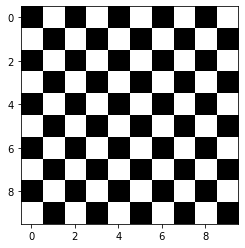

In [91]:
rows,cols=10,10
pattern=torch.ones(rows,cols,dtype=torch.uint8)*255
for row in range(rows):
    for col in range(cols):
        if (row+col)%2==0:
            pattern[row,col]=0
plt.imshow(pattern,cmap='gray')
plt.show()